# Data Insights and Visualizations

In [363]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('DataSet.xlsx','Raw Data-Order and Sample')
df.head()

,OrderType,OrderCategory,CustomerCode,CountryName,CustomerOrderNo,Custorderdate,UnitName,QtyRequired,TotalArea,Amount,ITEM_NAME,QualityName,DesignName,ColorName,ShapeName,AreaFt
0,Area Wise,Order,H-1,USA,1873354,2017-01-16,Ft,2,6.00,12.00,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],BEIGE,REC,6.00
1,Area Wise,Order,H-1,USA,1873354,2017-01-16,Ft,2,9.00,18.00,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],BEIGE,REC,9.00
2,Area Wise,Order,H-1,USA,1873354,2017-01-16,Ft,2,54.00,108.00,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],BEIGE,REC,54.00
3,Area Wise,Order,H-1,USA,1918436,2017-02-01,Ft,5,54.00,270.00,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],BEIGE,REC,54.00
4,Area Wise,Order,H-1,USA,1873354,2017-01-16,Ft,5,71.25,356.25,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],BEIGE,REC,71.25


In [364]:
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18955 entries, 0 to 18954
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   OrderType        18955 non-null  object        
 1   OrderCategory    18955 non-null  object        
 2   CustomerCode     18955 non-null  object        
 3   CountryName      18955 non-null  object        
 4   CustomerOrderNo  18946 non-null  object        
 5   Custorderdate    18955 non-null  datetime64[ns]
 6   UnitName         18955 non-null  object        
 7   QtyRequired      18955 non-null  int64         
 8   TotalArea        18955 non-null  float64       
 9   Amount           18955 non-null  float64       
 10  ITEM_NAME        18955 non-null  object        
 11  QualityName      18955 non-null  object        
 12  DesignName       18955 non-null  object        
 13  ColorName        18955 non-null  object        
 14  ShapeName        18955 non-null  objec

In [365]:
#Checking the number of rows and columns
print(df.shape)
print(df.columns)

(18955, 16)
Index(['OrderType', 'OrderCategory', 'CustomerCode', 'CountryName',
       'CustomerOrderNo', 'Custorderdate', 'UnitName', 'QtyRequired',
       'TotalArea', 'Amount', 'ITEM_NAME', 'QualityName', 'DesignName',
       'ColorName', 'ShapeName', 'AreaFt'],
      dtype='object')


C:\Users\niran\AppData\Local\Temp\ipykernel_8892\1695826115.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='QtyRequired', y='ITEM_NAME', data=item_quantity, palette='viridis')


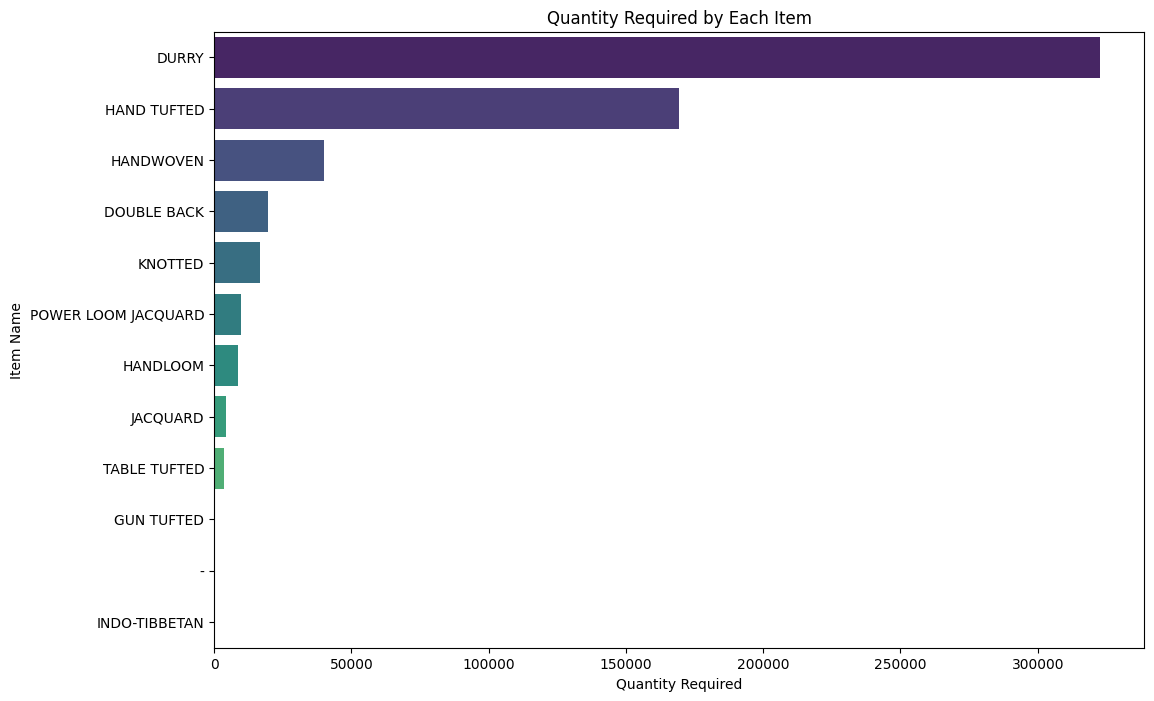

In [366]:
# Group by 'ITEM_NAME' and sum the 'QtyRequired' for each item
item_quantity = df.groupby('ITEM_NAME')['QtyRequired'].sum().reset_index()

item_quantity = item_quantity.sort_values(by='QtyRequired', ascending=False)

# Plotting the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='QtyRequired', y='ITEM_NAME', data=item_quantity, palette='viridis')
plt.title('Quantity Required by Each Item')
plt.xlabel('Quantity Required')
plt.ylabel('Item Name')
plt.show()


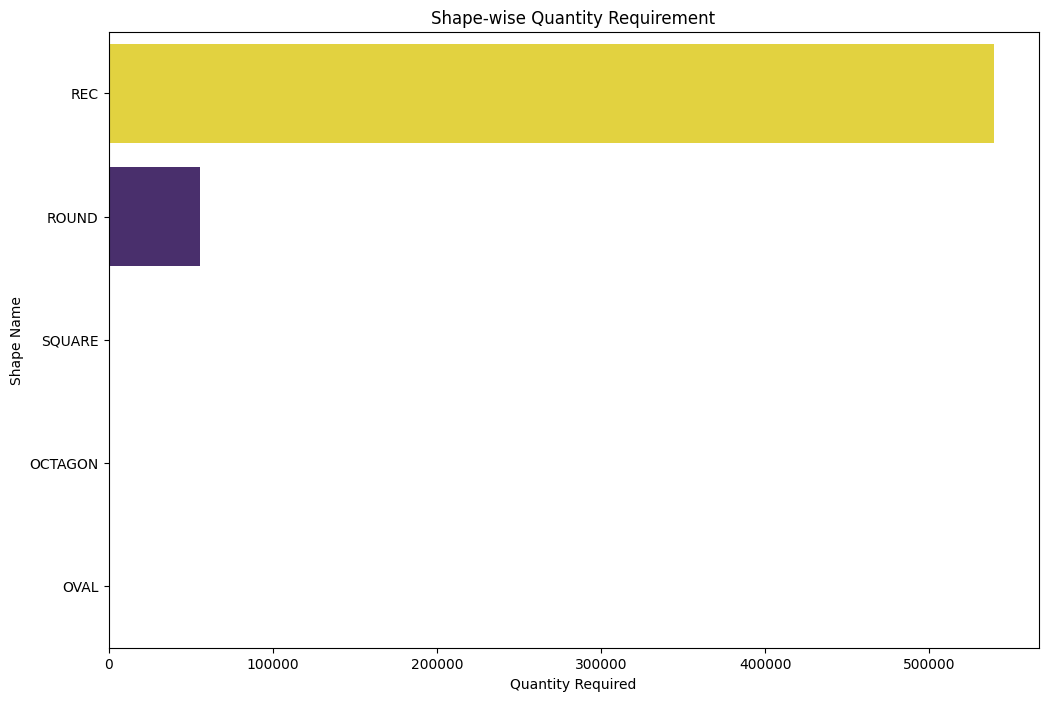

In [367]:
# Group by 'ShapeName' and sum the 'QtyRequired' for each shape
shape_quantity = df.groupby('ShapeName')['QtyRequired'].sum().reset_index()

shape_quantity = shape_quantity.sort_values(by='QtyRequired', ascending=False)

# Plotting the bar chart
plt.figure(figsize=(12, 8))
# sns.barplot(x='QtyRequired', y='ShapeName', data=shape_quantity, palette='viridis')
sns.barplot(x='QtyRequired', y='ShapeName', hue='QtyRequired', data=shape_quantity, palette='viridis', legend=False)
plt.title('Shape-wise Quantity Requirement')
plt.xlabel('Quantity Required')
plt.ylabel('Shape Name')
plt.show()

C:\Users\niran\AppData\Local\Temp\ipykernel_8892\1089689595.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='OrderYear', y='Amount', data=yearly_amount, palette='viridis')


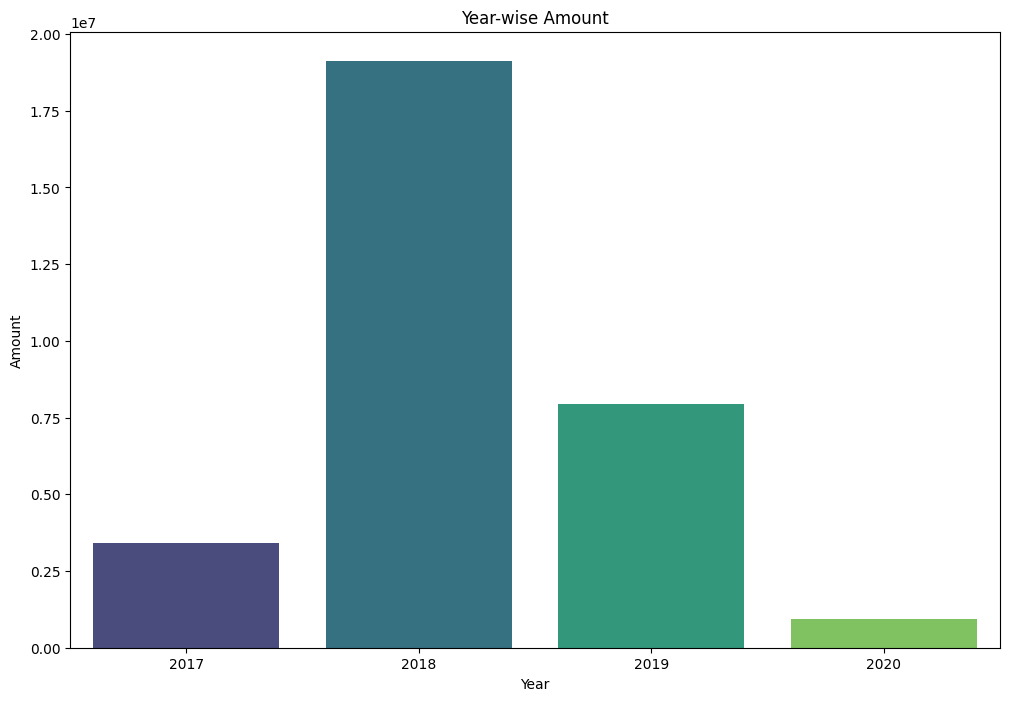

In [368]:
# Convert 'Custorderdate' to datetime format
df['Custorderdate'] = pd.to_datetime(df['Custorderdate'])

# Extract the year from 'Custorderdate'
df['OrderYear'] = df['Custorderdate'].dt.year

# Group by 'OrderYear' and sum the 'Amount' for each year
yearly_amount = df.groupby('OrderYear')['Amount'].sum().reset_index()

# Plotting the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='OrderYear', y='Amount', data=yearly_amount, palette='viridis')
plt.title('Year-wise Amount')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.show()


C:\Users\niran\AppData\Local\Temp\ipykernel_8892\2902475107.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='OrderMonth', y='Amount', data=monthly_amount, palette='viridis', legend=False)


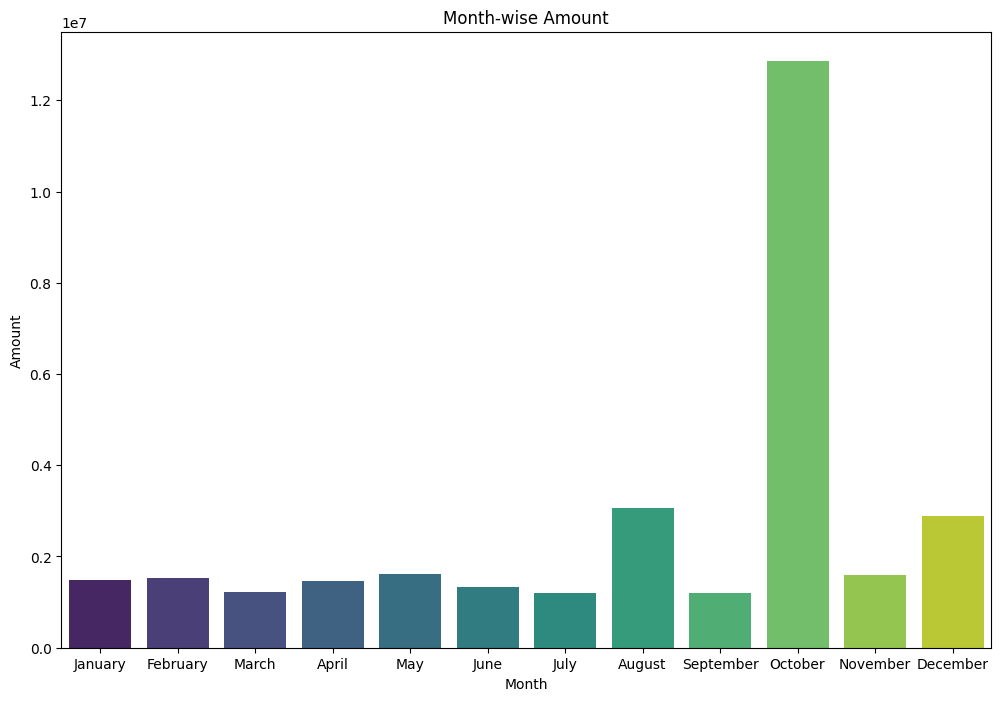

In [369]:
df['Custorderdate'] = pd.to_datetime(df['Custorderdate'])
df['OrderMonth'] = df['Custorderdate'].dt.month_name()

# Group by 'OrderMonth' and sum the 'Amount' for each month
monthly_amount = df.groupby('OrderMonth')['Amount'].sum().reset_index()

# Sort the DataFrame by month order
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_amount['OrderMonth'] = pd.Categorical(monthly_amount['OrderMonth'], categories=months_order, ordered=True)
monthly_amount = monthly_amount.sort_values('OrderMonth')

# Plotting the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='OrderMonth', y='Amount', data=monthly_amount, palette='viridis', legend=False)
plt.title('Month-wise Amount')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.show()


In [370]:
#REVENUE BY CUSTOMER

df=pd.read_excel('DataSet.xlsx','Data Order ONLY') 

# Group by 'Customer name' and calculate the  'Revenue contribution' for each customer
Revenue_customer = df.groupby('CustomerCode')['Amount'].sum()

# Display the Revenue by customer
print(Revenue_customer)


CustomerCode
A-11    1.854041e+05
A-6     6.247460e+03
A-9     1.592080e+06
B-2     1.481116e+04
B-3     5.862686e+04
B-4     2.624250e+04
C-1     5.676207e+05
C-2     1.557123e+06
C-3     9.906235e+04
CC      1.475740e+05
CTS     2.380000e+04
DR      2.864812e+04
E-2     1.167783e+05
F-1     1.168382e+05
F-6     1.680000e+04
G-1     3.970124e+04
G-4     3.288752e+02
H-1     6.538379e+04
H-2     3.804801e+06
I-2     4.266260e+05
JL      1.231578e+06
K-2     5.987727e+04
K-3     4.099995e+02
L-2     2.150349e+04
L-3     9.075675e+04
L-4     4.423400e+04
L-5     3.588900e+05
M-1     1.959794e+06
M-2     3.342452e+05
N-1     9.493757e+05
P-4     2.925445e+05
P-5     3.066518e+06
PC      2.279496e+05
PD      4.045289e+05
R-4     1.010880e+04
RC      3.282907e+05
S-2     5.674273e+04
S-3     6.136800e+04
T-2     5.630988e+05
T-4     2.382410e+05
T-5     7.338329e+05
T-6     1.014880e+05
T-9     7.589700e+02
TGT     1.134105e+07
V-1     4.776128e+04
Name: Amount, dtype: float64


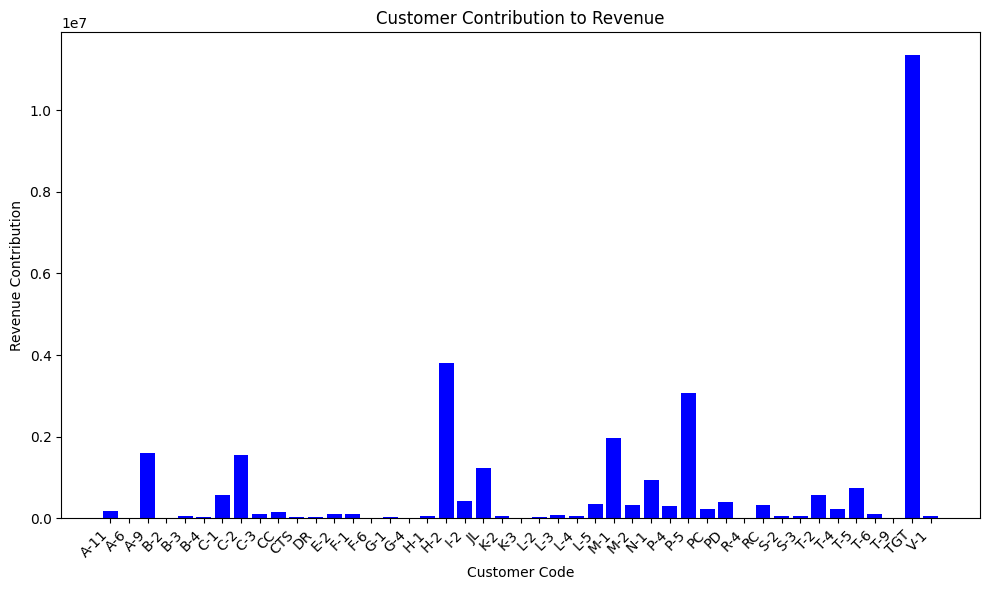

In [371]:
# Reset index to convert the result to a DataFrame
Revenue_customer_df = Revenue_customer.reset_index()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(Revenue_customer_df['CustomerCode'], Revenue_customer_df['Amount'], color='blue') 
plt.xlabel('Customer Code')
plt.ylabel('Revenue Contribution')
plt.title('Customer Contribution to Revenue')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

In [372]:
#REVENUE BY COUNTRY

# Group by 'Country' and calculate the  'Revenue contribution' for each customer
Revenue_country = df.groupby('CountryName')['Amount'].sum()

# Display the Revenue by Country
print(Revenue_country)

CountryName
AUSTRALIA       3.569389e+05
BELGIUM         4.267914e+05
BRAZIL          5.987727e+04
CANADA          1.167783e+05
CHINA           2.491996e+04
INDIA           1.475740e+05
ISRAEL          1.712888e+04
ITALY           5.630988e+05
LEBANON         5.674273e+04
ROMANIA         4.266260e+05
SOUTH AFRICA    1.304580e+05
UAE             4.423400e+04
UK              1.965411e+06
USA             2.708287e+07
Name: Amount, dtype: float64


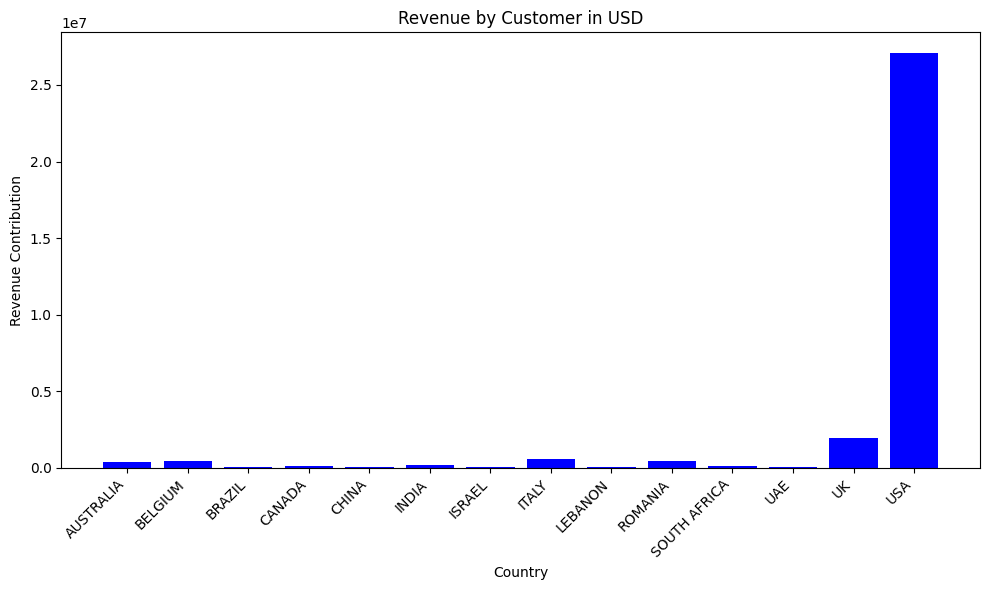

In [373]:
# Reset index to convert the result to a DataFrame
Revenue_country_df = Revenue_country.reset_index()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(Revenue_country_df['CountryName'], Revenue_country_df['Amount'], color='blue') 
plt.xlabel('Country')
plt.ylabel('Revenue Contribution')
plt.title('Revenue by Customer in USD')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

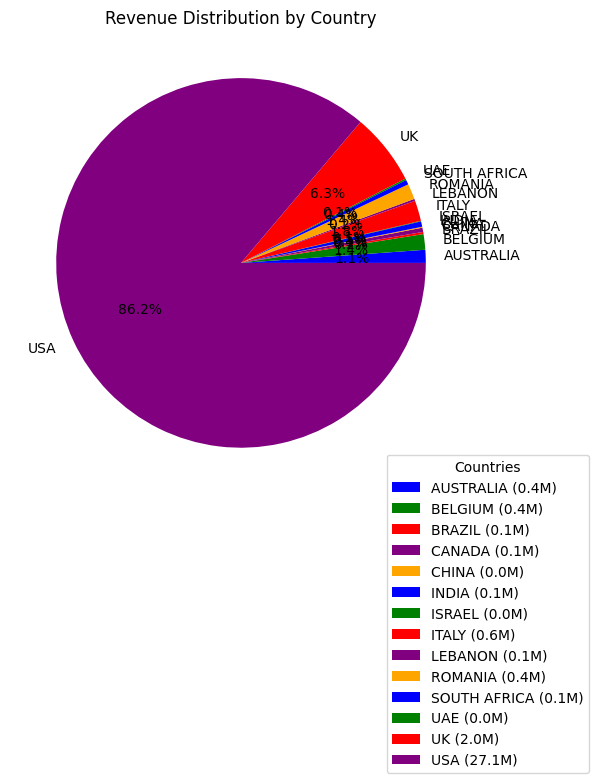

In [374]:
# Plotting the pie chart
plt.figure(figsize=(10, 6))
wedges, texts, autotexts = plt.pie(Revenue_country_df['Amount'], labels=Revenue_country_df['CountryName'], autopct='%1.1f%%', colors=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('Revenue Distribution by Country')

# Adding legend with values
legend_labels = [f"{label} ({value:.1f}M)" for label, value in zip(Revenue_country_df['CountryName'], Revenue_country_df['Amount'] / 1e6)]
plt.legend(legend_labels, title='Countries', loc='upper left', bbox_to_anchor=(0.8, 0.1))
plt.show()


# Checking Order Conversion Rate - Using 'Data on Sample ONLY' sheet

In [375]:
data=pd.read_excel('DataSet.xlsx', sheet_name='Data on Sample ONLY') 
data.shape

(5820, 25)

In [376]:
# #Data Preprocessing
print(data.isnull().sum())
mask = data.isnull()
null_value_rows = data[mask.any(axis=1)]
null_value_rows

CustomerCode         0
CountryName          0
USA                 39
UK                  39
Italy               39
Belgium             39
Romania             39
Australia           39
India               39
QtyRequired          0
ITEM_NAME            0
Hand Tufted          0
Durry                0
Double Back          0
Hand Woven           0
Knotted              0
Jacquard             0
Handloom             0
Other                0
ShapeName            0
REC                  0
Round                0
Square               0
AreaFt               0
Order Conversion     0
dtype: int64


,CustomerCode,CountryName,USA,UK,Italy,Belgium,Romania,Australia,India,QtyRequired,...,Knotted,Jacquard,Handloom,Other,ShapeName,REC,Round,Square,AreaFt,Order Conversion
75,F-2,POLAND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,0,0,0,0,REC,1,0,0,39.8125,1
433,E-2,CANADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,...,0,0,0,0,REC,1,0,0,6.0000,1
1192,E-2,CANADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,0,1,0,0,REC,1,0,0,6.0000,1
1193,E-2,CANADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,0,1,0,0,REC,1,0,0,6.0000,1
1194,E-2,CANADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,0,1,0,0,REC,1,0,0,6.0000,0
1195,E-2,CANADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,0,1,0,0,REC,1,0,0,6.0000,0
1196,E-2,CANADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,0,1,0,0,REC,1,0,0,6.0000,1
1197,E-2,CANADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,0,1,0,0,REC,1,0,0,6.0000,1
1198,E-2,CANADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,0,1,0,0,REC,1,0,0,6.0000,1
1199,E-2,CANADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,0,1,0,0,REC,1,0,0,6.0000,1


In [377]:
data.dropna(inplace=True)
print("After droping null values the shape of DataFrame is "+ str(data.shape))

After droping null values the shape of DataFrame is (5781, 25)


In [378]:
# Calculate the percentage of rows with 'Order conversion' value equal to 1
percentage_of_ones = data['Order Conversion'].mean() * 100

print(f"Percentage of successful oder conversion: {percentage_of_ones:.2f}%")

Percentage of successful oder conversion: 19.91%


In [379]:
# Customer wise Order Conversion Rate Calculation
conversion_rates = data.groupby('CustomerCode')['Order Conversion'].mean()*100
print(conversion_rates)

CustomerCode
A-11    25.000000
A-9     41.891892
B-3      0.000000
C-1     41.025641
C-2     41.269841
CC      13.727480
CTS      0.000000
F-1     26.666667
H-2     38.918919
I-2     45.000000
JL      70.909091
K-3      0.000000
L-5     11.111111
M-1     38.655462
M-2     34.000000
N-1      5.172414
P-4     19.354839
P-5     51.470588
PC       0.000000
PD      92.424242
RC      30.000000
S-3     20.370370
T-2     22.222222
T-4     50.000000
T-5     20.270270
TGT     15.909091
V-1      9.090909
Name: Order Conversion, dtype: float64


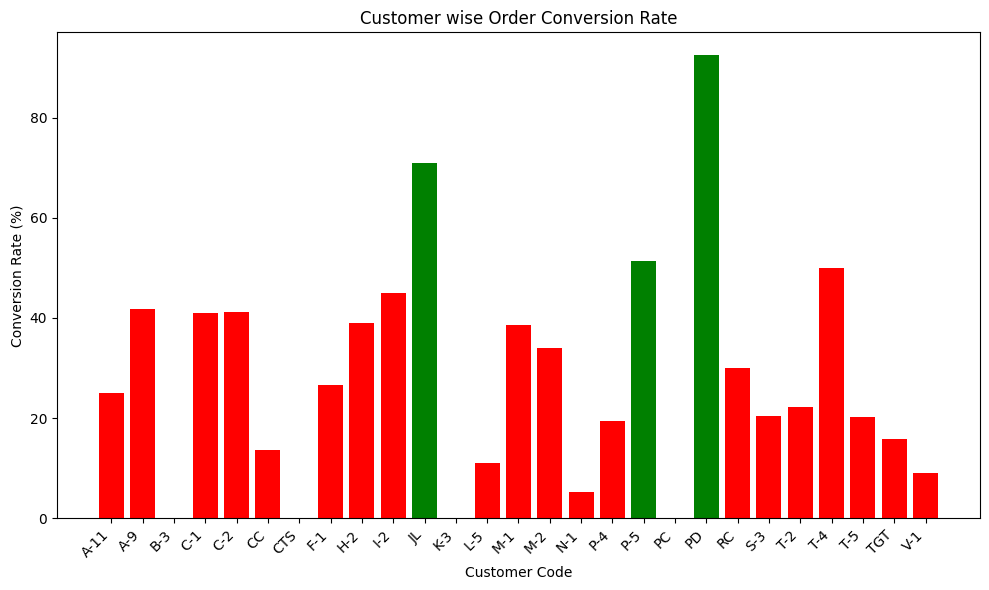

In [380]:
# Reset index to convert the result to a DataFrame
conversion_rates_df = conversion_rates.reset_index()
threshold = 50
colors = np.where(conversion_rates_df['Order Conversion'] > threshold, 'green', 'red')

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(conversion_rates_df['CustomerCode'], conversion_rates_df['Order Conversion'], color=colors)  
plt.xlabel('Customer Code')
plt.ylabel('Conversion Rate (%)')
plt.title('Customer wise Order Conversion Rate')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()


# Creating Machine learning Model for checking whether the Sample will be converted into Order

In [381]:
df = pd.read_excel('Dataset.xlsx','Data on Sample ONLY')
df.shape

(5820, 25)

In [382]:
#Removing Imbalancing before creating the model- OVERSAMPLING
print("initial shape of data:- "+ str(df.shape))

# Counting the number of rows where 'Order Conversion' is equal to 1
count_conversion_1 = (df['Order Conversion'] == 1).sum()

print(f'Number of rows with Order Conversion value 1: {count_conversion_1}')

initial shape of data:- (5820, 25)
Number of rows with Order Conversion value 1: 1169


In [383]:
#OVERSAMPLING Minority Class

# Filter rows with 'Order Conversion' equal to 1
rows_to_duplicate = df[df['Order Conversion'] == 1]

# Duplicating the rows in the same DataFrame
df = pd.concat([df, rows_to_duplicate], ignore_index=True)

#Number of Rows After Oversampling
df.shape

(6989, 25)

In [384]:
# Count the number of rows where 'Order Conversion' is equal to 1
count_conversion_1 = (df['Order Conversion'] == 1).sum()

# Print the result
print(f'New Number of rows with Order Conversion value 1: {count_conversion_1}')

New Number of rows with Order Conversion value 1: 2338


# 1) Logistic Regression

In [385]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

columnNames = ['CustomerCode', 'CountryName', 'QtyRequired', 'ITEM_NAME', 'ShapeName', 'AreaFt']
X = df[columnNames]
y = df['Order Conversion']

X_encoded = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=1)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and fit the logistic regression model
model = LogisticRegression()
fit = model.fit(X_train, y_train)

# Predictions
y_train_pred = fit.predict(X_train)
y_test_pred = fit.predict(X_test)

# Accuracy calculation using accuracy_score
acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)

print(f"For Logistic Regression - Train Accuracy: {acc_train:.3f}; Test Accuracy: {acc_test:.3f}")

# Display confusion matrix
print("Confusion Matrix for Logistic Regression:")
print(confusion_matrix(y_test, y_test_pred))
print("\n")

# Display classification report
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_test_pred))

For Logistic Regression - Train Accuracy: 0.850; Test Accuracy: 0.861
Confusion Matrix for Logistic Regression:
[[1324   66]
 [ 226  481]]


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1390
           1       0.88      0.68      0.77       707

    accuracy                           0.86      2097
   macro avg       0.87      0.82      0.83      2097
weighted avg       0.86      0.86      0.86      2097



# 2) Decision Tree

In [386]:
from sklearn.tree import DecisionTreeClassifier

columnNames = ['CustomerCode', 'CountryName', 'QtyRequired', 'ITEM_NAME', 'ShapeName', 'AreaFt']
X = df[columnNames]
y = df['Order Conversion']

X_encoded = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=1)

X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = DecisionTreeClassifier(random_state=1)
fit = model.fit(X_train, y_train)

y_train_pred = fit.predict(X_train)
y_test_pred = fit.predict(X_test)

# accuracy = correctly classified / total classified
acc_train = sum(y_train_pred==y_train)/len(y_train)
acc_test = sum(y_test_pred==y_test)/len(y_test)
print(f"For Decision Tree Classifier:- train accuracy: {acc_train:.3f}; test accuracy: {acc_test:.3f}")

# Display confusion matrix
print("Confusion Matrix for Decision Tree Classifier:")
print(confusion_matrix(y_test, y_test_pred))
print("\n")

# Display classification report
print("Classification Report for Decision Tree Classifier:")
print(classification_report(y_test, y_test_pred))

For Decision Tree Classifier:- train accuracy: 0.924; test accuracy: 0.899
Confusion Matrix for Decision Tree Classifier:
[[1315   75]
 [ 136  571]]


Classification Report for Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1390
           1       0.88      0.81      0.84       707

    accuracy                           0.90      2097
   macro avg       0.90      0.88      0.88      2097
weighted avg       0.90      0.90      0.90      2097



# 3) KNN Classifier

In [387]:
from sklearn.neighbors import KNeighborsClassifier

columnNames = ['CustomerCode', 'CountryName', 'QtyRequired', 'ITEM_NAME', 'ShapeName', 'AreaFt']
X = df[columnNames]
y = df['Order Conversion']

# Using get_dummies to perform one-hot encoding
X_encoded = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=1)

X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = KNeighborsClassifier(n_neighbors=5)
fit = model.fit(X_train, y_train)

y_train_pred = fit.predict(X_train)
y_test_pred = fit.predict(X_test)

# accuracy = correctly classified / total classified
acc_train = sum(y_train_pred==y_train)/len(y_train)
acc_test = sum(y_test_pred==y_test)/len(y_test)
print(f"For KNN Classifier:- train accuracy: {acc_train:.3f}; test accuracy: {acc_test:.3f}")

# Display confusion matrix
print("Confusion Matrix for KNN Classifier:")
print(confusion_matrix(y_test, y_test_pred))
print("\n")

# Display classification report
print("Classification Report for KNN Classifier:")
print(classification_report(y_test, y_test_pred))

For KNN Classifier:- train accuracy: 0.903; test accuracy: 0.888
Confusion Matrix for KNN Classifier:
[[1316   74]
 [ 161  546]]


Classification Report for KNN Classifier:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1390
           1       0.88      0.77      0.82       707

    accuracy                           0.89      2097
   macro avg       0.89      0.86      0.87      2097
weighted avg       0.89      0.89      0.89      2097



# 4) Random Forest

In [388]:
from sklearn.ensemble import RandomForestClassifier

columnNames = ['CustomerCode', 'CountryName', 'QtyRequired', 'ITEM_NAME', 'ShapeName', 'AreaFt']
X = df[columnNames]
y = df['Order Conversion']

X_encoded = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=1)
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = RandomForestClassifier(n_estimators=40, random_state=1)
fit = model.fit(X_train, y_train)

y_train_pred = fit.predict(X_train)
y_test_pred = fit.predict(X_test)

# accuracy = correctly classified / total classified
acc_train = sum(y_train_pred==y_train)/len(y_train)
acc_test = sum(y_test_pred==y_test)/len(y_test)
print(f"For Random Forest Classifier:- train accuracy: {acc_train:.3f}; test accuracy: {acc_test:.3f}")

# Display confusion matrix
print("Confusion Matrix for Random Forest Classifier:")
print(confusion_matrix(y_test, y_test_pred))
print("\n")

# Display classification report
print("Classification Report for Random Forest Classifier:")
print(classification_report(y_test, y_test_pred))

For Random Forest Classifier:- train accuracy: 0.923; test accuracy: 0.904
Confusion Matrix for Random Forest Classifier:
[[1320   70]
 [ 131  576]]


Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1390
           1       0.89      0.81      0.85       707

    accuracy                           0.90      2097
   macro avg       0.90      0.88      0.89      2097
weighted avg       0.90      0.90      0.90      2097



# Clustering - Customer Segments

In [389]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df = pd.read_excel('Dataset.xlsx','Data for Clustering')

selected_features = ['Sum of QtyRequired', 'Sum of TotalArea', 'Sum of Amount',
       'DURRY', 'HANDLOOM', 'DOUBLE BACK', 'JACQUARD', 'HAND TUFTED',
       'HAND WOVEN', 'KNOTTED', 'GUN TUFTED', 'Powerloom Jacquard',
       'INDO TEBETAN']

df_subset = df[selected_features]

scaler = StandardScaler()
df_subset_scaled = scaler.fit_transform(df_subset)

kmn= KMeans(n_clusters = 3)
labels = kmn.fit_predict(df_subset_scaled)
df['Cluster'] = labels

df_subset_scaled = pd.DataFrame(df_subset_scaled, columns=selected_features)

df.rename(columns={'Row Labels': 'CustomerCode'}, inplace=True)
cluster_customers = df.groupby('Cluster')['CustomerCode'].agg(list).reset_index()
pd.set_option('display.max_colwidth', None)
sorted_df = df.sort_values(by='Cluster')
print(sorted_df[['Cluster', 'CustomerCode']])

    Cluster CustomerCode
27        0          M-1
31        0          P-5
0         1         A-11
24        1          L-3
25        1          L-4
26        1          L-5
28        1          M-2
29        1          N-1
30        1          P-4
32        1           PC
33        1           PD
34        1          R-4
35        1           RC
36        1          S-2
37        1          S-3
38        1          T-2
39        1          T-4
40        1          T-5
41        1          T-6
42        1          T-9
23        1          L-2
43        1          TGT
22        1          K-3
20        1           JL
1         1          A-6
2         1          A-9
3         1          B-2
4         1          B-3
5         1          B-4
6         1          C-1
7         1          C-2
8         1          C-3
9         1           CC
10        1          CTS
11        1           DR
12        1          E-2
13        1          F-1
14        1          F-6
15        1          G-1


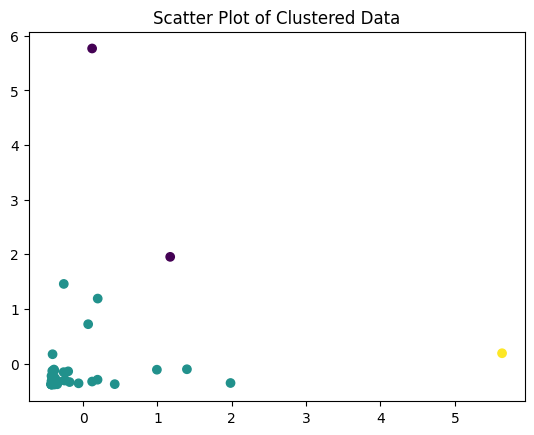

In [390]:
plt.scatter(df_subset_scaled.iloc[:, 0], df_subset_scaled.iloc[:, 1], c=labels)
plt.title('Scatter Plot of Clustered Data')
plt.show()

In [391]:
inertia_list = []
for k in np.arange(1,9):
    kmn = KMeans(n_clusters = k)
    kmn.fit(df_subset_scaled)
    inertia_list.append(kmn.inertia_)
    
inertia_list

[585.0,
 418.65642721559595,
 422.59147686250685,
 254.9244995920952,
 214.74748349902902,
 184.832191785272,
 124.60215481683389,
 85.3180375746198]

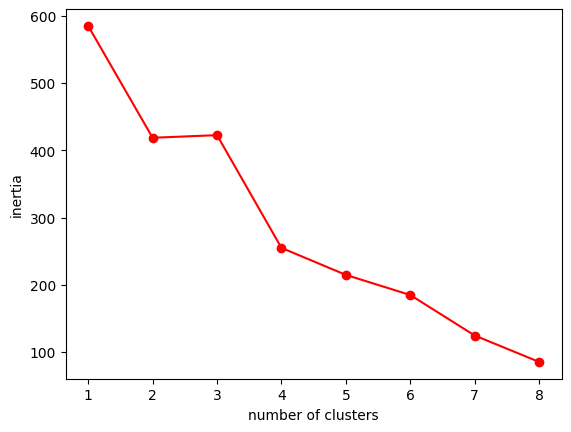

In [392]:
plt.plot(np.arange(1,9), inertia_list, 'ro-')
plt.xlabel("number of clusters")
plt.ylabel("inertia")
plt.show()

# RECOMMENDATION USING KMEANS CLUSTERING

In [393]:
import pandas as pd
from sklearn.cluster import KMeans

df = pd.read_excel('Dataset.xlsx','Raw Data-Order and Sample')
df = df[df['OrderCategory'] == 'Order']


X = df[['QtyRequired', 'TotalArea', 'Amount', 'AreaFt']]

num_clusters = 8
kmeans = KMeans(n_clusters=num_clusters)
df['Cluster'] = kmeans.fit_predict(X)

# Creating a function to recommend items based on the cluster
def recommend_items(customer_code):
    # Find the cluster label for the given customer
    cluster_label = df[df['CustomerCode'] == customer_code]['Cluster'].values[0]

    # Filtering customers in the same cluster
    cluster_customers = df[df['Cluster'] == cluster_label]

    # Getting preferences within the cluster (most common item, shape, color, Quality)
    top_item = cluster_customers['ITEM_NAME'].mode().values[0]
    top_shape = cluster_customers['ShapeName'].mode().values[0]
    top_color = cluster_customers['ColorName'].mode().values[0]
    top_QualityName = cluster_customers['QualityName'].mode().values[0]
    
    print(f"Recommendations for Customer {customer_code} are Item:- {top_item}, Shape:- {top_shape}, Color:- {top_color}, QualityName:- {top_QualityName}")

customer_code = 'TGT'
recommend_items(customer_code)

Recommendations for Customer TGT are Item:- HAND TUFTED, Shape:- REC, Color:- BLUE, QualityName:- TUFTED 52C WOOL ALL LOOP


In [394]:
customer_code = 'P-5'
recommend_items(customer_code)

Recommendations for Customer P-5 are Item:- HAND TUFTED, Shape:- REC, Color:- MULTI, QualityName:- TUFTED 60C ALL LOOP


In [395]:
customer_code = 'H-2'
recommend_items(customer_code)

Recommendations for Customer H-2 are Item:- HAND TUFTED, Shape:- REC, Color:- NAVY, QualityName:- TUFTED 60C ALL LOOP


# Recommendation Using Maximum values

In [396]:
def get_customer_recommendations(customerCode, df_recommend):
    selected_customer_data = df_recommend[df_recommend['Customer '] == customerCode]

    section1_cols = ['Hand Tufted', 'Double Wowen', 'Durry', 'Double Back', 'Knotted', 'Jacquared', 'Handloom', 'Other']
    section2_cols = ['Rectangle', 'Square', 'Round']
    section3_cols = ['Purple', 'Gray', 'Navy', 'PINK', 'BLUE', 'BLUSH PINK', 'NEUTRAL', 'TAN', 'NAVY']

    # Create subsets for each section
    section1_data = selected_customer_data[section1_cols]
    section2_data = selected_customer_data[section2_cols]
    section3_data = selected_customer_data[section3_cols]

    # Find the top two columns with the highest values in each section
    top_two_section1 = section1_data.apply(lambda x: x.nlargest(2).index.tolist(), axis=1)
    top_two_section2 = section2_data.apply(lambda x: x.nlargest(2).index.tolist(), axis=1)
    top_two_section3 = section3_data.apply(lambda x: x.nlargest(2).index.tolist(), axis=1)

    # Return the recommendations
    print(f'For the Customer {customerCode}, the Recommendations are:')
    print('Item Names:', ', '.join(top_two_section1.iloc[0]))
    print('Shape Names:', ', '.join(top_two_section2.iloc[0]))
    print('Color Names:', ', '.join(top_two_section3.iloc[0]))

df_recommend = pd.read_excel('Dataset.xlsx', sheet_name='Data for Recommendation', usecols='A:U')

customerCode_prediction = 'JL'
recommendations = get_customer_recommendations(customerCode_prediction, df_recommend)


For the Customer JL, the Recommendations are:
Item Names: Durry, Double Wowen
Shape Names: Rectangle, Round
Color Names: BLUE, Gray


In [397]:
customerCode_prediction = 'T-5'
recommendations = get_customer_recommendations(customerCode_prediction, df_recommend)

For the Customer T-5, the Recommendations are:
Item Names: Durry, Hand Tufted
Shape Names: Rectangle, Round
Color Names: Gray, BLUE


# Time Series for Forecasting Orders

c:\Virtual_Envs\MLVenv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Virtual_Envs\MLVenv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


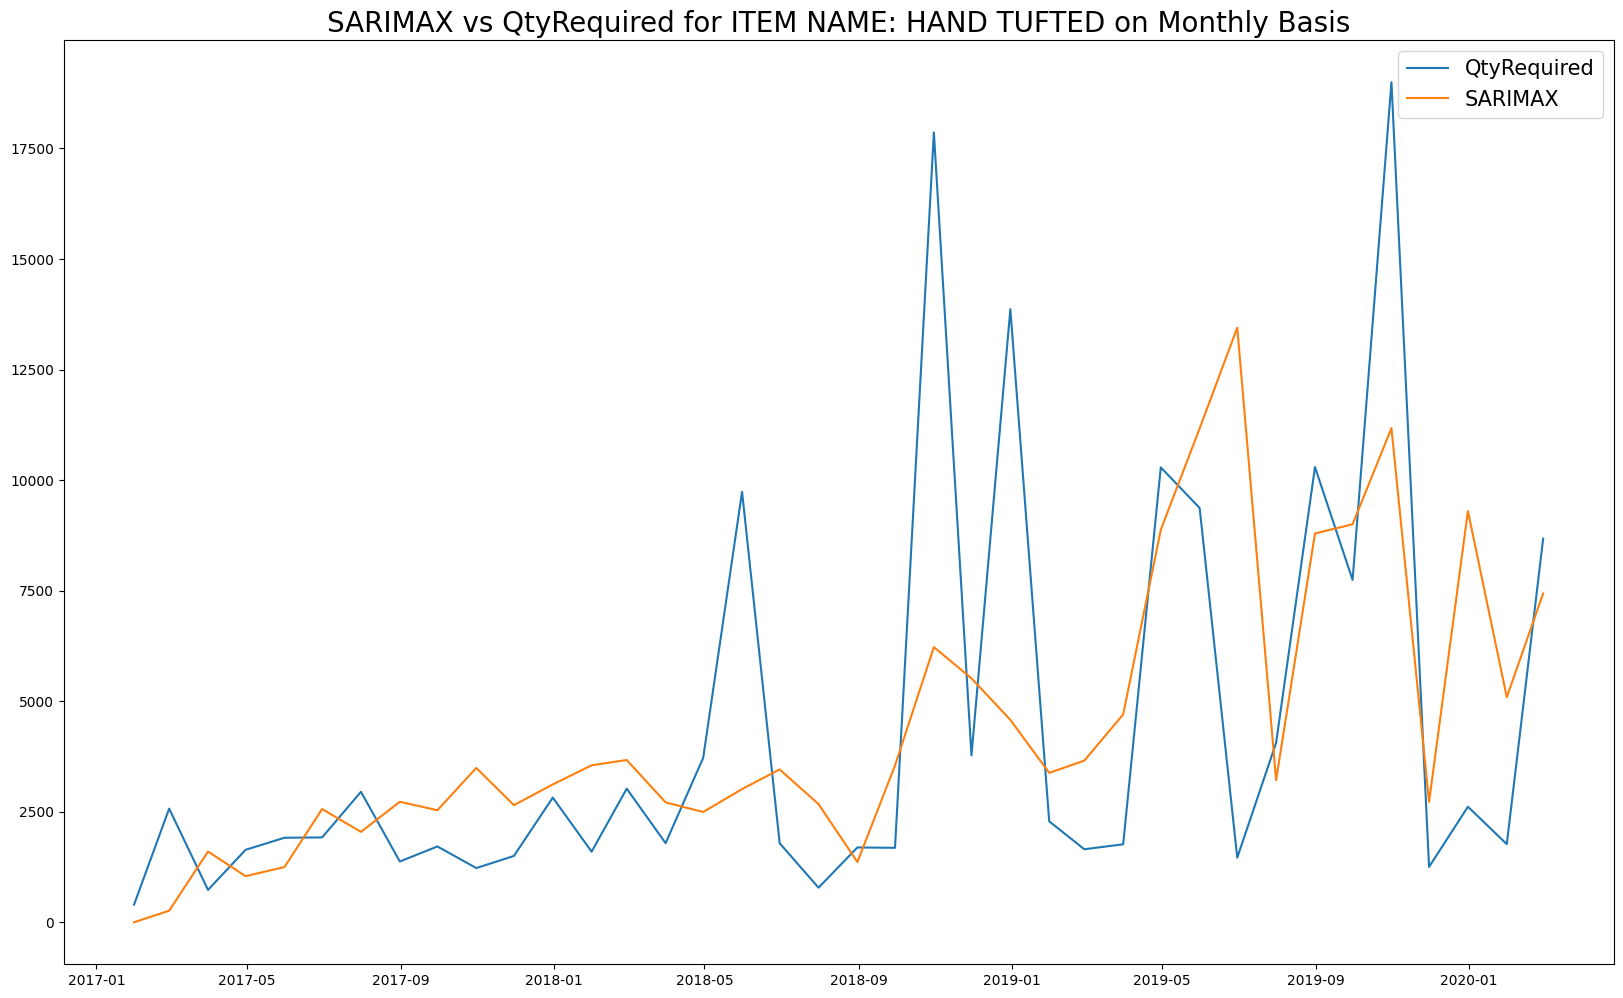

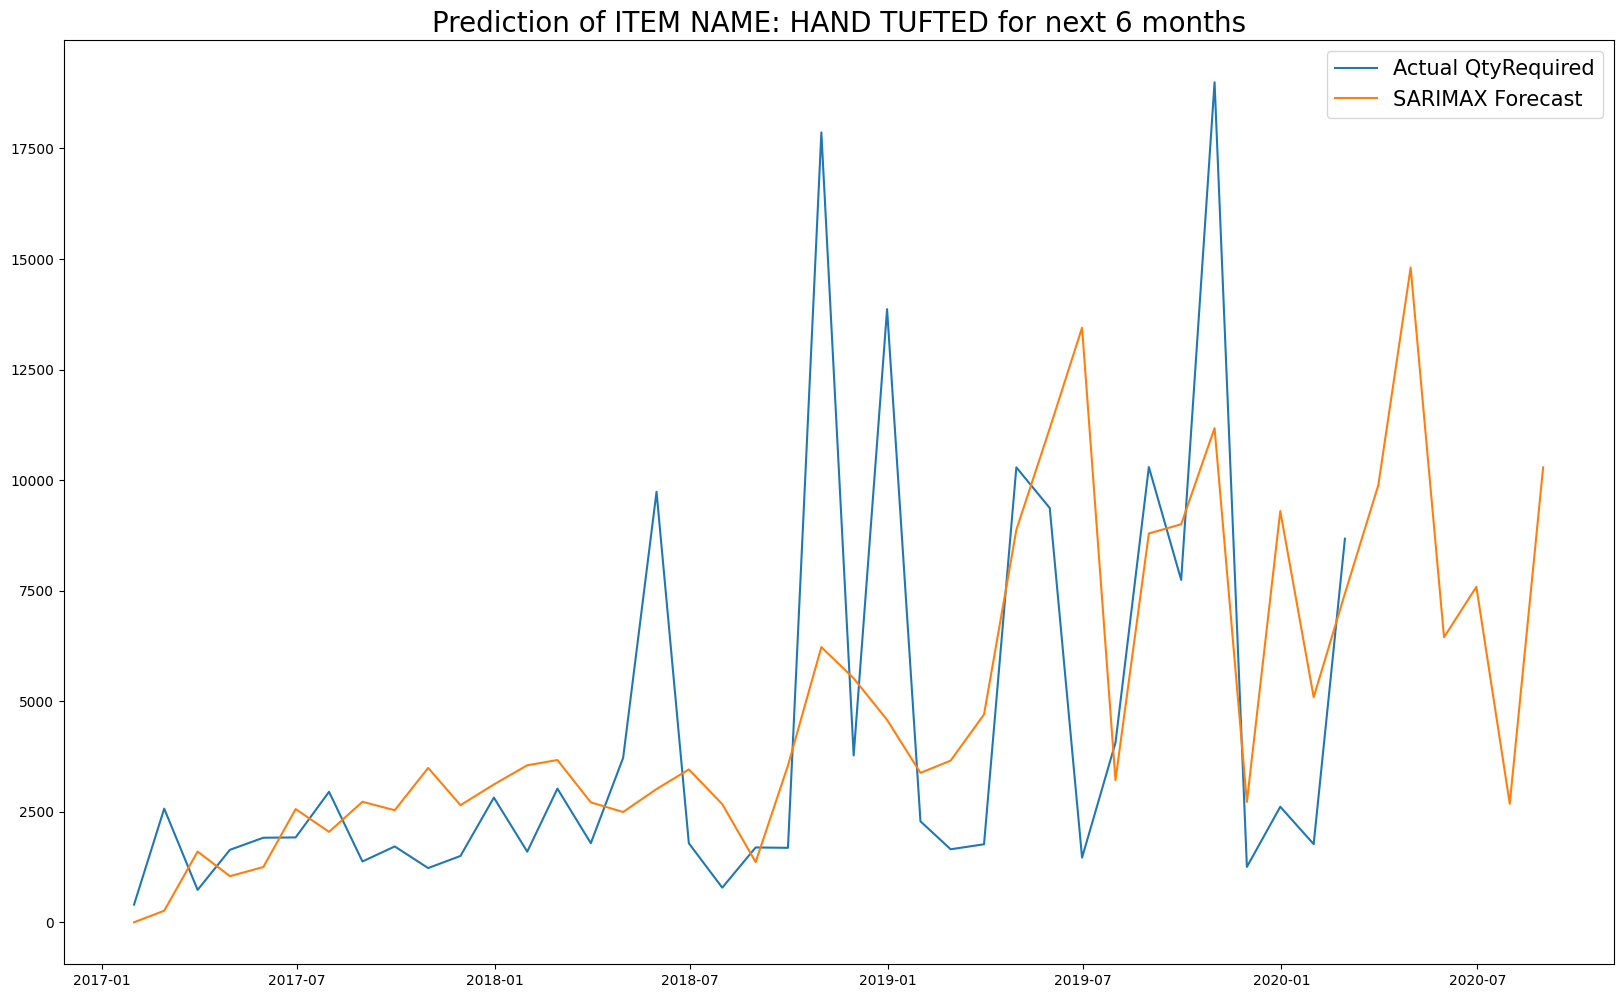

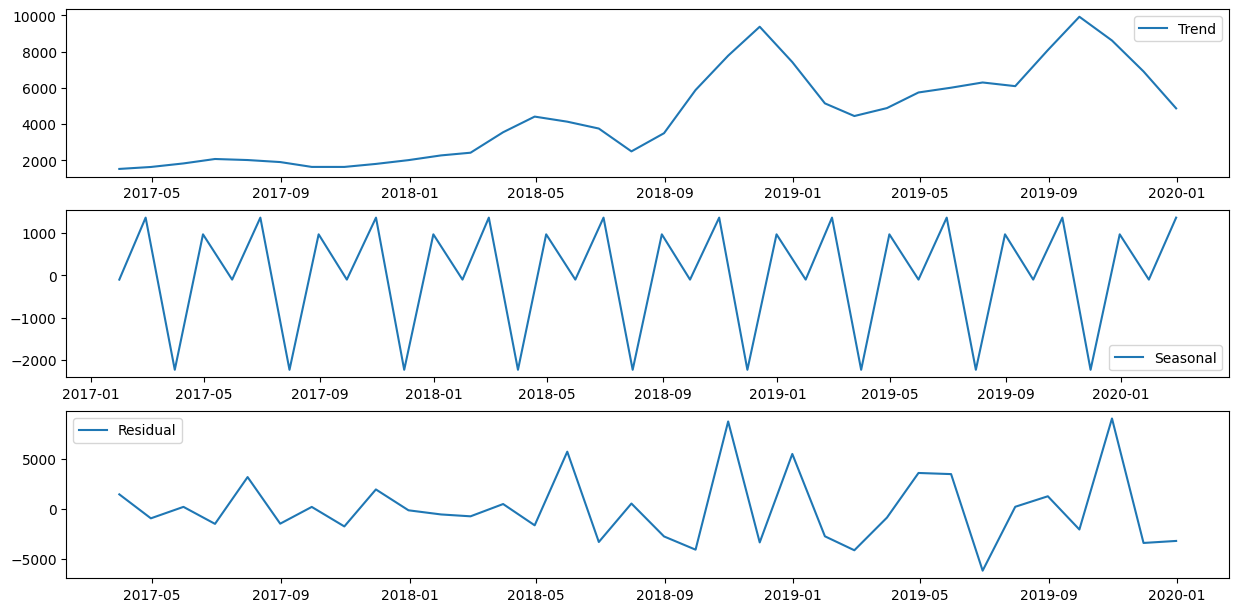

In [398]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

def analyze_and_visualize_time_series(item_name, df):
    df = df[df['OrderCategory'] == 'Order']
    filtered_records = df[df['ITEM_NAME'] == item_name][['Custorderdate', 'QtyRequired']]

    # Resample the data at a monthly frequency and sum the quantities for each month
    monthly_data = filtered_records.resample('ME', on='Custorderdate').sum()
    monthly_data = monthly_data.reset_index()

    # Create SARIMAX model
    model = SARIMAX(monthly_data['QtyRequired'], order=(3, 1, 3), seasonal_order=(2, 1, 2, 4))
    res = model.fit()

    # Add fitted values to the DataFrame
    monthly_data['sarimax'] = res.fittedvalues

    # Plotting SARIMAX vs QtyRequired
    plt.figure(figsize=(20, 12))
    plt.plot(monthly_data['Custorderdate'], monthly_data['QtyRequired'], label='QtyRequired')
    plt.plot(monthly_data['Custorderdate'], monthly_data['sarimax'], label='SARIMAX')
    plt.title(f'SARIMAX vs QtyRequired for ITEM NAME: {item_name} on Monthly Basis', fontsize=20)
    plt.legend(fontsize=15)
    plt.show()

    # Extend the time range for prediction (next 6 months)
    forecast_steps = 6
    forecast = res.get_forecast(steps=forecast_steps)
    forecast_index = pd.date_range(monthly_data['Custorderdate'].max(), periods=forecast_steps + 1, freq='ME')[1:]
    forecast_values = forecast.predicted_mean.values

    # Create a DataFrame for the forecast
    forecast_df = pd.DataFrame({'Custorderdate': forecast_index, 'sarimax': forecast_values})

    # Concatenate 'sarimax' values with the forecast
    combined_forecast = pd.concat([monthly_data[['Custorderdate', 'sarimax']], forecast_df])

    # Plotting SARIMAX Forecast vs QtyRequired
    plt.figure(figsize=(20, 12))
    plt.plot(monthly_data['Custorderdate'], monthly_data['QtyRequired'], label='Actual QtyRequired')
    plt.plot(combined_forecast['Custorderdate'], combined_forecast['sarimax'], label='SARIMAX Forecast')
    plt.title(f'Prediction of ITEM NAME: {item_name} for next 6 months', fontsize=20)
    plt.legend(fontsize=15)
    plt.show()

    # Decompose the time series
    decomposition = seasonal_decompose(monthly_data['QtyRequired'], model='additive', period=4)

    # Get the trend, seasonal, and residual components
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    # Plot the components
    plt.figure(figsize=(15, 10))

    plt.subplot(4, 1, 2)
    plt.plot(monthly_data['Custorderdate'], trend, label='Trend')
    plt.legend()

    plt.subplot(4, 1, 3)
    plt.plot(monthly_data['Custorderdate'], seasonal, label='Seasonal')
    plt.legend()

    plt.subplot(4, 1, 4)
    plt.plot(monthly_data['Custorderdate'], residual, label='Residual')
    plt.legend()
    plt.show()

df = pd.read_excel('Dataset.xlsx', 'Raw Data-Order and Sample')

# Convert 'Custorderdate' and 'QtyRequired' to their required formats
df['Custorderdate'] = pd.to_datetime(df['Custorderdate'])
df['QtyRequired'] = pd.to_numeric(df['QtyRequired'], errors='coerce')

item_name_to_analyze = 'HAND TUFTED'
analyze_and_visualize_time_series(item_name_to_analyze, df)


c:\Virtual_Envs\MLVenv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Virtual_Envs\MLVenv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Virtual_Envs\MLVenv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Virtual_Envs\MLVenv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


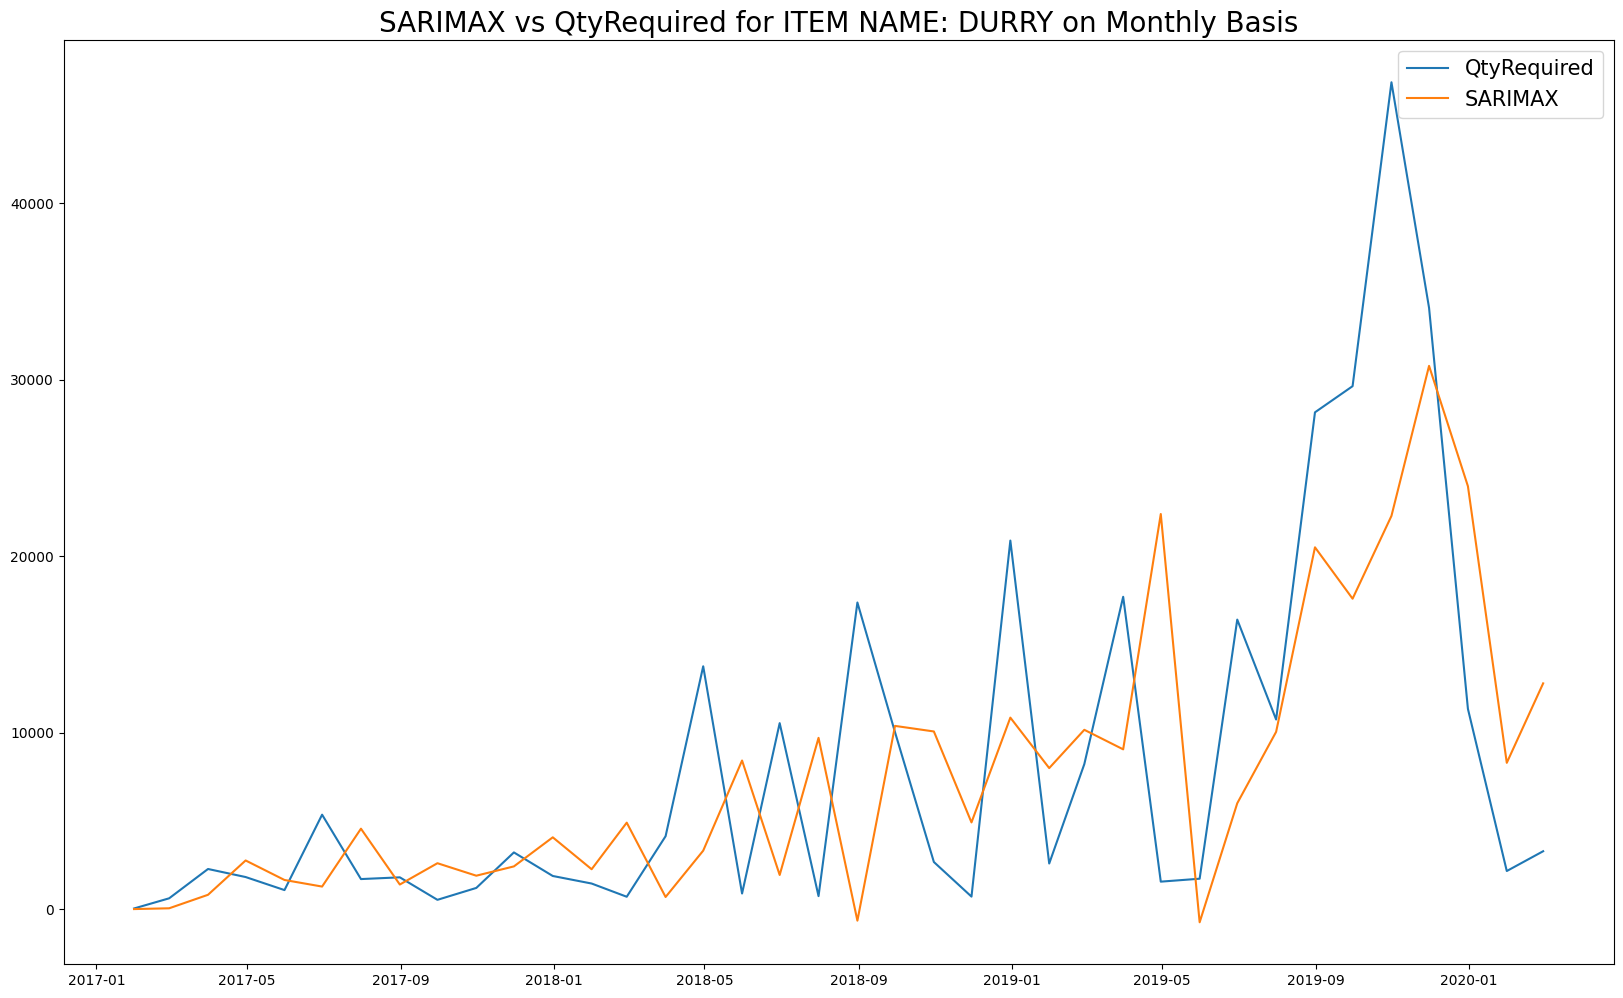

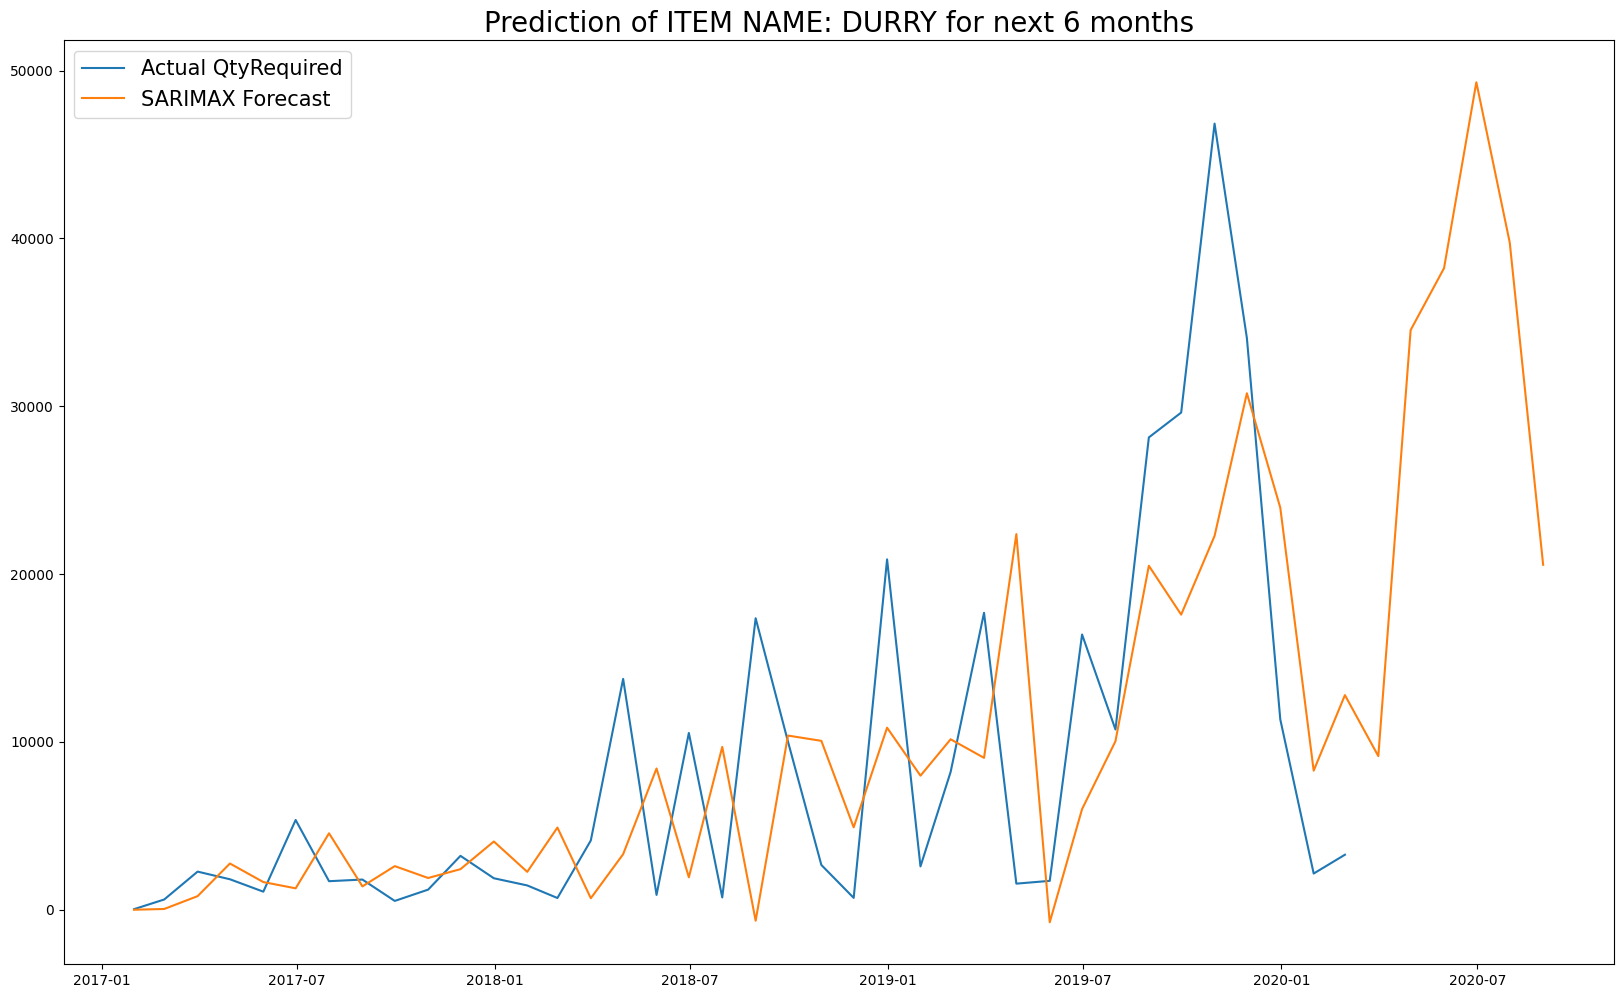

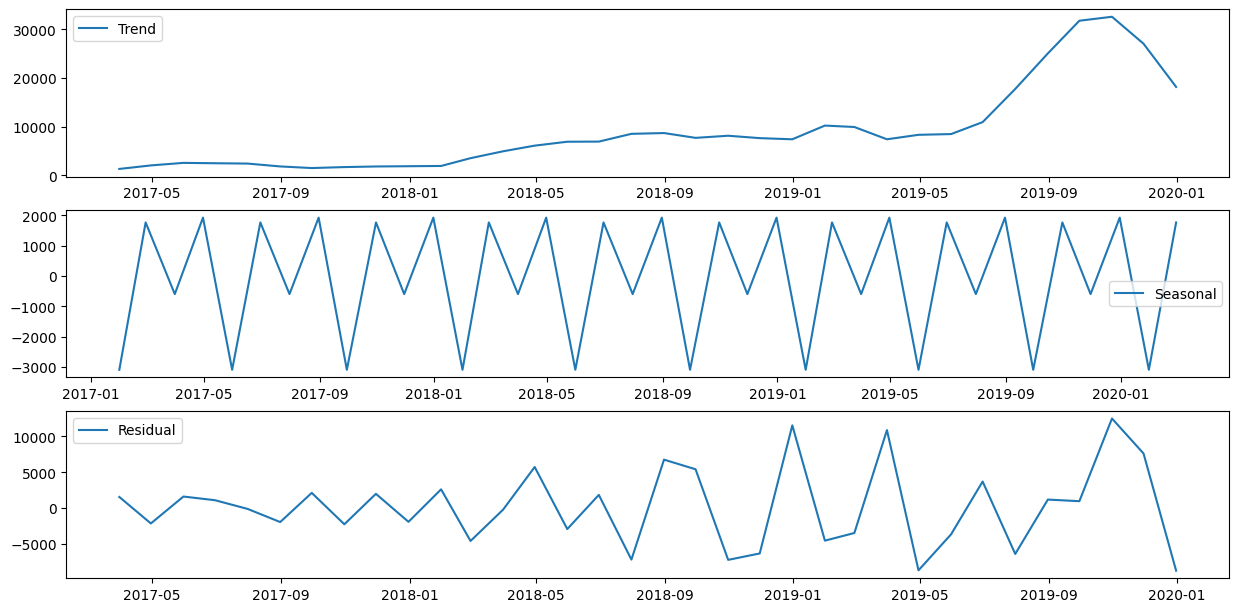

In [399]:
item_name_to_analyze = 'DURRY'
analyze_and_visualize_time_series(item_name_to_analyze, df)

In [400]:
#END